# ***Google's AI Research***

![ss]( https://github.com/batuhanyndny/intro/blob/master/DL/ss.png?raw=1)

# Short Intro to  Deep Learning 

**-Methods and Basics of neural networks**


**-Simple Neural Network Example**

# Methods
 * ***Regression***

*  ***Classification***


# ** Linear Regression**

In [0]:
import seaborn as sns
import pandas as pd
%matplotlib inline

In [0]:
data=pd.read_csv("https://raw.githubusercontent.com/batuhanyndny/intro/master/2-TypesOfML/ipynb/data/Advertising.csv")

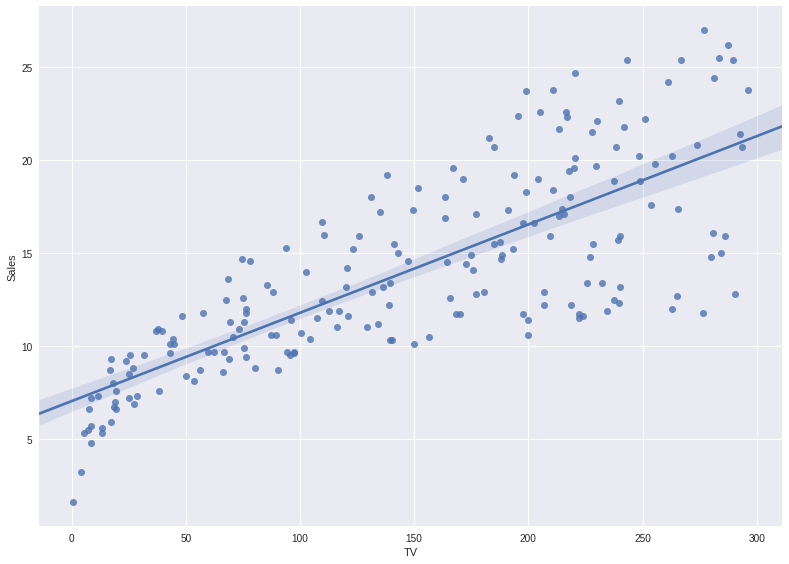

In [3]:
sns.pairplot(data,x_vars=["TV"],y_vars="Sales",size=8,aspect=1.4,kind="reg")

# **Classification**

In [0]:
from sklearn.datasets import load_iris
iris= load_iris()

In [5]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

![***Iris***](https://github.com/batuhanyndny/intro/blob/master/DL/iris_petal_sepal.png?raw=true)

In [6]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [7]:
from sklearn.neighbors import KNeighborsClassifier
X = iris.data
y = iris.target
knn = KNeighborsClassifier(n_neighbors=1)
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')


In [8]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [9]:
knn.predict([[2,4,3,2]])

array([1])

# ***Basic Neural Network Example***

In [36]:
!pip3 install http://download.pytorch.org/whl/cu92/torch-0.4.1-cp36-cp36m-linux_x86_64.whl torchvision

In [37]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
!pip install pillow==4.1.1
%reload_ext autoreload
%autoreload

In [38]:
!nvidia-smi

Thu Dec 20 20:32:11 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.44                 Driver Version: 396.44                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    56W / 149W |    310MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [39]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [40]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=2)

devtestset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [0]:
batch_size = 16
test_split = .3
shuffle_dataset = True
random_seed= 42

# Creating data indices for training and validation splits:
tevtestset_size = len(devtestset)
indices = list(range(tevtestset_size))
split = int(np.floor(test_split * tevtestset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
dev_indices, test_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
dev_sampler = SubsetRandomSampler(dev_indices)
test_sampler = SubsetRandomSampler(test_indices)

devloader = torch.utils.data.DataLoader(devtestset, batch_size=batch_size, 
                                           sampler=dev_sampler)
testloader = torch.utils.data.DataLoader(devtestset, batch_size=batch_size,
                                                sampler=test_sampler)

  car   car   car  deer   dog  ship   car   car   car  deer  deer  ship  ship  frog  frog horse


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f9c53bb6278>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/usr/local/lib/python3.6/dist-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/usr/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/usr/lib/python3.6/multiprocessing/resource_sharer.py", line 87, in get_connection
    c = Client(address, authkey=process.current_process().authkey)
  Fil

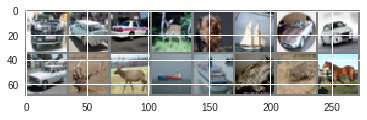

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(16)))

# ***Define a CNN***

In [45]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3) # channels filters 3x3 filter
        self.pool = nn.MaxPool2d(2, 2)  # 2x2 grid 
        self.conv2 = nn.Conv2d(6, 16, 3) # filters 6 filters at top , 16 filters , grid 3
        self.conv3= nn.Conv2d(16,18,3)
        self.dropout1 = nn.Dropout(0.05)
        self.fc1 = nn.Linear(18*2*2,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64,32)
        self.fc5 = nn.Linear(32,16)
        self.fc6 = nn.Linear(16,10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1,72)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout1(x)
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x=self.fc6(x)
        return x

net = Net()
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 18, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.05)
  (fc1): Linear(in_features=72, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=32, bias=True)
  (fc5): Linear(in_features=32, out_features=16, bias=True)
  (fc6): Linear(in_features=16, out_features=10, bias=True)
)

# ***Define a Optimizer and Loss Function***

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# ***Train the Network***

In [47]:
num_epochs = 50

# Used for tracking loss and plotting later
train_losses2 = []
dev_losses2 = []

print('Training...')
for epoch in range(num_epochs):  # loop over the dataset multiple times
    print('Epoch', epoch)
    train_loss = 0.0   
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
      
        # Send the inputs to GPU if available
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # track loss for printing
        train_loss += loss.item()
       
    # print average dev loss
    avg_train_loss = train_loss/len(trainloader)
    print('  average train mini-batch loss: {:.6f}'.format(avg_train_loss))
    train_losses2.append(avg_train_loss)

    # Calculate dev loss after every epoch
    with torch.no_grad():
        dev_loss = 0.0
        for data in devloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            dev_loss += loss.item()
        avg_dev_loss = dev_loss/len(devloader)
        print('  average dev mini-batch loss: {:.6f}'.format(avg_dev_loss))
        dev_losses2.append(avg_dev_loss)
            
    # Save the model so we can restore later
    print('  saving model checkpoint')
    # See https://pytorch.org/tutorials/beginner/saving_loading_models.html
    torch.save(net.state_dict(), 'net_checkpoint_{}.pth'.format(epoch))

print('Finished Training')

Training...
Epoch 0
  average train mini-batch loss: 2.304438
  average dev mini-batch loss: 2.302692
  saving model checkpoint
Epoch 1
  average train mini-batch loss: 2.302814
  average dev mini-batch loss: 2.302560
  saving model checkpoint
Epoch 2
  average train mini-batch loss: 2.302801
  average dev mini-batch loss: 2.302543
  saving model checkpoint
Epoch 3
  average train mini-batch loss: 2.302797
  average dev mini-batch loss: 2.302548
  saving model checkpoint
Epoch 4
  average train mini-batch loss: 2.302749
  average dev mini-batch loss: 2.302588
  saving model checkpoint
Epoch 5
  average train mini-batch loss: 2.302767
  average dev mini-batch loss: 2.302736
  saving model checkpoint
Epoch 6
  average train mini-batch loss: 2.302743
  average dev mini-batch loss: 2.302415
  saving model checkpoint
Epoch 7
  average train mini-batch loss: 2.302765
  average dev mini-batch loss: 2.302473
  saving model checkpoint
Epoch 8
  average train mini-batch loss: 2.302726
  average 

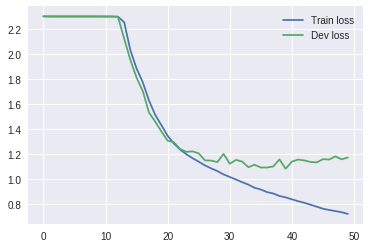

In [48]:
import matplotlib.pyplot as plt
plt.plot(train_losses2, label='Train loss')
plt.plot(dev_losses2, label='Dev loss')
plt.legend()
plt.show()

In [49]:
#Load the best epoch for best results
best_net = Net()
best_epoch = np.argmin(dev_losses2)
best_net.load_state_dict(torch.load('net_checkpoint_{}.pth'.format(best_epoch)))
best_net.eval()
best_net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 18, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.05)
  (fc1): Linear(in_features=72, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=32, bias=True)
  (fc5): Linear(in_features=32, out_features=16, bias=True)
  (fc6): Linear(in_features=16, out_features=10, bias=True)
)

In [50]:
# Calculate dev loss after every epoch
with torch.no_grad():
    test_loss = 0.0
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = best_net(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
    avg_test_loss = test_loss/len(testloader)
    print('  average test mini-batch loss: {:.6f}'.format(avg_test_loss))

  average test mini-batch loss: 1.078242


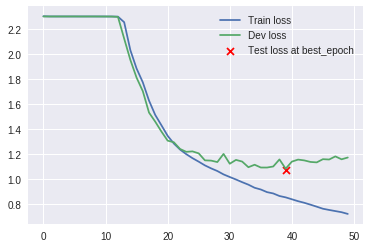

In [51]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(train_losses2, label='Train loss')
plt.plot(dev_losses2, label='Dev loss')
plt.scatter(best_epoch, avg_test_loss, marker='x', color='r', label='Test loss at best_epoch')
plt.legend()
plt.show()


***Early Stopping:***

![Early Stopping](https://github.com/batuhanyndny/intro/blob/master/DL/early_stopping.png?raw=1)

In [52]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %


In [53]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 71 %
Accuracy of   car : 64 %
Accuracy of  bird : 50 %
Accuracy of   cat : 40 %
Accuracy of  deer : 48 %
Accuracy of   dog : 53 %
Accuracy of  frog : 82 %
Accuracy of horse : 72 %
Accuracy of  ship : 68 %
Accuracy of truck : 59 %


In [54]:
!git clone https://github.com/batuhanyndny/intro


Cloning into 'intro'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 512 (delta 46), reused 40 (delta 5), pack-reused 388
Receiving objects: 100% (512/512), 18.64 MiB | 18.46 MiB/s, done.
Resolving deltas: 100% (203/203), done.


In [55]:
cd intro/DL/Datasets

/content/intro/DL/Datasets/intro/DL/Datasets


In [56]:
ls

bird1.jfif  bird2.jfif  cat1.jfif  cat2.jfif  jfif/  plane1.jfif  plane2.jfif


In [57]:
import PIL
print(PIL.PILLOW_VERSION)
from PIL import Image
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

4.0.0


In [58]:
import PIL
print(PIL.PILLOW_VERSION)
from PIL import Image
from torch.autograd import Variable
imsize = 256
loader = transforms.Compose([transforms.Resize(imsize), transforms.ToTensor()])

def image_loader(image_name):
    """load image, returns cuda tensor"""
    image = Image.open(image_name)
    image = loader(image).float()
    image = Variable(image, requires_grad=True)
    image = image.unsqueeze(0)  #this is for VGG, may not be needed for ResNet
    return image.cuda()  #assumes that you're using GPU

imagebird1 = image_loader("bird1.jfif")
imagebird2 = image_loader("bird2.jfif")
imagecat2 = image_loader("cat2.jfif")
imageplane1 = image_loader("plane1.jfif")
imageplane2 = image_loader("plane2.jfif")

4.0.0


In [60]:
print(best_net(imagebird1))
print(best_net(imagebird2))
print(best_net(imagecat2))
print(best_net(imageplane1))
print(best_net(imageplane2))

tensor([[-1.8130, -1.9947,  2.0250,  ..., -1.8187, -3.8206, -1.4814],
        [-1.8130, -1.9947,  2.0250,  ..., -1.8187, -3.8206, -1.4814],
        [-1.8130, -1.9947,  2.0250,  ..., -1.8187, -3.8206, -1.4814],
        ...,
        [-1.9293, -3.2712,  2.1836,  ...,  0.1183, -5.5514, -2.0494],
        [-0.9183, -2.3467,  1.2860,  ..., -0.9893, -2.5186, -0.9019],
        [-1.5108, -2.7214,  2.0772,  ...,  0.1343, -5.6729, -1.7337]],
       device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([[-1.8130, -1.9947,  2.0250,  ..., -1.8187, -3.8206, -1.4814],
        [-1.8130, -1.9947,  2.0250,  ..., -1.8187, -3.8206, -1.4814],
        [-1.8130, -1.9947,  2.0250,  ..., -1.8187, -3.8206, -1.4814],
        ...,
        [-1.8422, -1.9152,  1.8696,  ..., -1.7129, -3.8188, -1.3030],
        [-1.8130, -1.9947,  2.0250,  ..., -1.8187, -3.8206, -1.4814],
        [-1.8130, -1.9947,  2.0250,  ..., -1.8187, -3.8206, -1.4814]],
       device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([[-1.4805, -1.8523,  2.